<div align="center"><img src="files/pwr.png"></div>
<h1>
    <div align="center">
        Theory and Engineering of ICT Traffic<br>
        <span style="font-weight:normal;"><font size="4">(Teoria i Inżynieria Ruchu Teleinformatycznego)</font></span>
    </div>
</h1>
<h3>
    <b>Subject:</b>
</h3>
<p>
    <b>EN:</b> "Service for anomaly detection in communications data trafic using the method of time series analysis.<br>
    Implementation and comaparison of selected methods."
</p>
<p>
    <b>PL:</b> "Usługa wykrywania anomalii w ruchu teleinformatycznym z wykorzystaniem metody analizy szeregów czasowych.<br>
    Implementacja i porównanie wybranych metod."
</p>
<h3>
    <b>Author:</b>
</h3>
<p>
    P.Grochowski
</p>

<h2>
    Used packages:
</h2>

In [1]:
import os
import operator
import numpy
import pandas
import matplotlib

from collections import Counter

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14.0, 4.0)

<h2>
    <b>Used data:</b>
</h2>
<p>
    <b>Dataset source:</b><br>
    <a href="http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html">
    http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html</a><br>
<p>
</p>
    <b>Qute from the page:</b><br>
    "This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment."
</p>

In [2]:
# Get current working directory:
cwd = os.getcwd()

# Load data:
dataFileFull = 'data_full.csv'
dataFilePart = 'data_part.csv'
dataDirName = 'data'
filePath = os.path.join( cwd, dataDirName, dataFilePart )
csvData = pandas.read_csv( filePath )

# Display table:
csvData

0  tcp  http  SF  181   5450  0.1  0.2  0.3  0.4   ...     9.1  \
0       0  tcp  http  SF  239    486    0    0    0    0   ...      19   
1       0  tcp  http  SF  235   1337    0    0    0    0   ...      29   
2       0  tcp  http  SF  219   1337    0    0    0    0   ...      39   
3       0  tcp  http  SF  217   2032    0    0    0    0   ...      49   
4       0  tcp  http  SF  217   2032    0    0    0    0   ...      59   
5       0  tcp  http  SF  212   1940    0    0    0    0   ...      69   
6       0  tcp  http  SF  159   4087    0    0    0    0   ...      79   
7       0  tcp  http  SF  210    151    0    0    0    0   ...      89   
8       0  tcp  http  SF  212    786    0    0    0    1   ...      99   
9       0  tcp  http  SF  210    624    0    0    0    0   ...     109   
10      0  tcp  http  SF  177   1985    0    0    0    0   ...     119   
11      0  tcp  http  SF  222    773    0    0    0    0   ...     129   
12      0  tcp  http  SF  256   1169    0    0    0    0   ...     139   
13      0  tcp  http  SF  241    259    0    0    0    0   ...     149   
14      0  tcp  http  SF  260   1837    0    0    0    0   ...     159   
15      0  tcp  http  SF  241    261    0    0    0    0   ...     169   
16      0  tcp  http  SF  257    818    0    0    0    0   ...     179   
17      0  tcp  http  SF  233    255    0    0    0    0   ...     189   
18      0  tcp  http  SF  233    504    0    0    0    0   ...     199   
19      0  tcp  http  SF  256   1273    0    0    0    0   ...     209   
20      0  tcp  http  SF  234    255    0    0    0    0   ...     219   
21      0  tcp  http  SF  241    259    0    0    0    0   ...     229   
22      0  tcp  http  SF  239    968    0    0    0    0   ...     239   
23      0  tcp  http  SF  245   1919    0    0    0    0   ...     249   
24      0  tcp  http  SF  248   2129    0    0    0    0   ...     255   
25      0  tcp  http  SF  354   1752    0    0    0    0   ...     255   
26      0  tcp  http  SF  193   3991    0    0    0    0   ...     255   
27      0  tcp  http  SF  214  14959    0    0    0    0   ...     255   
28      0  tcp  http  SF  212   1309    0    0    0    0   ...     255   
29      0  tcp  http  SF  215   3670    0    0    0    0   ...     255   
...    ..  ...   ...  ..  ...    ...  ...  ...  ...  ...   ...     ...   
493990  0  tcp  http  SF  296    617    0    0    0    0   ...     255   
493991  0  tcp  http  SF  294  29288    0    0    0    0   ...     255   
493992  0  tcp  http  SF  285  34557    0    0    0    0   ...     255   
493993  0  tcp  http  SF  316   3665    0    0    0    0   ...     255   
493994  0  tcp  http  SF  335  10440    0    0    0    0   ...     255   
493995  0  tcp  http  SF  284  10592    0    0    0    0   ...     255   
493996  0  tcp  http  SF  242   7066    0    0    0    0   ...     255   
493997  0  tcp  http  SF  223   3707    0    0    0    0   ...     255   
493998  0  tcp  http  SF  204   1731    0    0    0    0   ...     255   
493999  0  tcp  http  SF  148   1122    0    0    0    0   ...     255   
494000  0  tcp  http  S0    0      0    0    0    0    0   ...     255   
494001  0  tcp  http  SF  215   2649    0    0    0    0   ...     255   
494002  0  tcp  http  SF  341    326    0    0    0    0   ...     255   
494003  0  tcp  http  SF  341   1943    0    0    0    0   ...     255   
494004  0  tcp  http  SF  341   1663    0    0    0    0   ...     255   
494005  0  tcp  http  SF  235    501    0    0    0    0   ...     255   
494006  0  tcp  http  SF  320  13828    0    0    0    0   ...     255   
494007  0  tcp  http  SF  319   1435    0    0    0    0   ...     255   
494008  0  tcp  http  SF  335   3435    0    0    0    0   ...     255   
494009  0  tcp  http  SF  291    236    0    0    0    0   ...     255   
494010  0  tcp  http  SF  308    662    0    0    0    0   ...     255   
494011  0  tcp  http  SF  291   1862    0    0    0    0   ...     255   
494012  0  t

<h2>
    Column descriptions:
</h2>

In [3]:
# Get description:
filePath = os.path.join( cwd, dataDirName, 'description.csv' )
csvDesc = pandas.read_csv( filePath )

# Display table:
csvDesc

Column   Data type  \
0                      duration  continuous   
1                 protocol_type    symbolic   
2                       service    symbolic   
3                          flag    symbolic   
4                     src_bytes  continuous   
5                     dst_bytes  continuous   
6                          land    symbolic   
7                wrong_fragment  continuous   
8                        urgent  continuous   
9                           hot  continuous   
10            num_failed_logins  continuous   
11                    logged_in    symbolic   
12              num_compromised  continuous   
13                   root_shell  continuous   
14                 su_attempted  continuous   
15                     num_root  continuous   
16           num_file_creations  continuous   
17                   num_shells  continuous   
18             num_access_files  continuous   
19            num_outbound_cmds  continuous   
20                is_host_login    symbolic   
21               is_guest_login    symbolic   
22                        count  continuous   
23                    srv_count  continuous   
24                  serror_rate  continuous   
25              srv_serror_rate  continuous   
26                  rerror_rate  continuous   
27              srv_rerror_rate  continuous   
28                same_srv_rate  continuous   
29                diff_srv_rate  continuous   
30           srv_diff_host_rate  continuous   
31               dst_host_count  continuous   
32           dst_host_srv_count  continuous   
33       dst_host_same_srv_rate  continuous   
34       dst_host_diff_srv_rate  continuous   
35  dst_host_same_src_port_rate  continuous   
36  dst_host_srv_diff_host_rate  continuous   
37         dst_host_serror_rate  continuous   
38     dst_host_srv_serror_rate  continuous   
39         dst_host_rerror_rate  continuous   
40     dst_host_srv_rerror_rate  continuous   
41        purpose_of_connection    symbolic   

                                          Description  
0       Length (number of seconds) of the connection.  
1           Type of the protocol, e.g. tcp, udp, etc.  
2   Network service on the destination, e.g., http...  
3           Normal or error status of the connection.  
4    Number of data bytes from source to destination.  
5    Number of data bytes from destination to source.  
6   1 if connection is from/to the same host/port;...  
7                        Number of 'wrong' fragments.  
8                           Number of urgent packets.  
9                         Number of 'hot' indicators.  
10                   Number of failed login attempts.  
11           1 if successfully logged in; 0 otherwise  
12                Number of 'compromised' conditions.  
13           1 if root shell is obtained; 0 otherwise  
14      1 if 'su root' command attempted; 0 otherwise  
15                         Number of 'root' accesses.  
16                Number of file creation operations.  
17                           Number of shell prompts.  
18      Number of operations on access control files.  
19     Number of outbound commands in an ftp session.  
20  1 if the login belongs to the 'hot' list; 0 ot...  
21      1 if the login is a 'guest'login; 0 otherwise  
22  Number of connections to the same host as the ...  
23  Number of connections to the same service as t...  
24  Percent of connections that have 'SYN' errors....  
25  Percent of connections that have 'SYN' errors....  
26  Percent of connections that have 'REJ' errors....  
27  Percent of connections that have 'REJ' errors....  
28  Percent of connections to the same service. (R...  
29  Percent of connections to different services. ...  
30  Percent of connections to different hosts. (Re...  
31                                                ---  
32                                                ---  
33                                                ---  
34                                         

<h2>
    Connection durations analysis:
</h2>
<h3>
    Scatterplot &amp; trend:
</h3>
<p>
    Here we present quantity analysis of connection durations with scatterplot using also popular statistic method 'trend'.
</p>

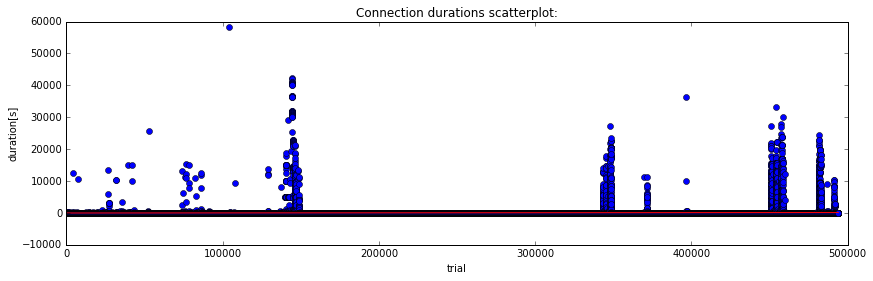

In [4]:
# Get list of connection durations:
durations = csvData.as_matrix()[:,0].tolist()

# Make scatterplot:
_y=durations
_x=numpy.arange(len(_y))
matplotlib.pyplot.plot(_x,_y,'bo')

# Calculate trendline:
# (Linear fitting.)
_z = numpy.polyfit(_x, _y, 1)
_p = numpy.poly1d(_z)
matplotlib.pyplot.plot(_x,_p(_x),'r-')

# Show plot:
matplotlib.pyplot.xlabel('trial')
matplotlib.pyplot.ylabel('duration[s]')
matplotlib.pyplot.title('Connection durations scatterplot:')
matplotlib.pyplot.show()

<p>
    As we can see applying trendline (red one) was pointless for raw dataset.
</p>

<h3>
    Histogram:
</h3>
<p>
    Assuming that regular cases represent over 90% of total, the rest should be considered as anomalies.<br>
    Purpose of histograms presented below is to visualize data distribution at these assumptions.
</p>

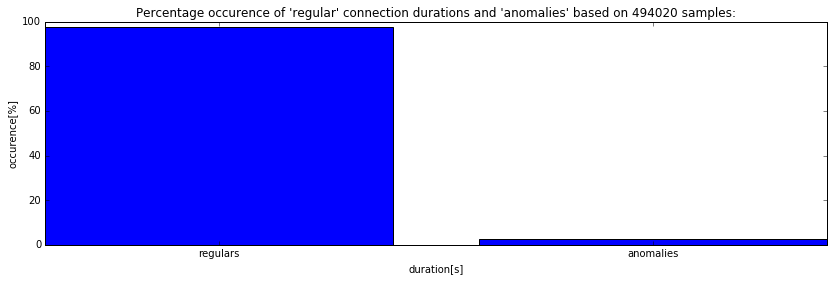

In [5]:
# Create histogram from '_n' data samples:
_n = len(durations)
durPortion = durations[:_n]
durPortion = sorted(durPortion)
durPortion = Counter(durPortion)
durPortion = sorted(durPortion.items(),key=operator.itemgetter(1),reverse=True)

_max=sum([item[1] for item in durPortion])
_toPopRear=0
_countRear=0
for item in durPortion:
    if (item[1]/_max) < 0.9:
        _toPopRear += 1
        _countRear += item[1]
for idx in range(_toPopRear):
    durPortion.pop(-1)
_countFront = durPortion[0][1]
durPortion.pop()
durPortion.append(('regulars',_countFront))
durPortion.append(('anomalies',_countRear))

lengths,counts = zip(*durPortion)

# Create plot:
_max=sum(counts)
_xAxis=numpy.arange(len(counts))
_width=0.8
matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(_xAxis,[(item/_max)*100 for item in counts],_width)
matplotlib.pyplot.xticks(_xAxis+_width*0.5,lengths)

# Show plot:
matplotlib.pyplot.xlabel('duration[s]')
matplotlib.pyplot.ylabel('occurence[%]')
matplotlib.pyplot.title('Percentage occurence of \'regular\' connection durations and \'anomalies\' based on %d samples:' % _n)
matplotlib.pyplot.show()

<p>
    So now lets focus only on anomalies.<br>
    We assume that they take less then 10% of all occurences.<br>
    <br>
    <u>However there might be loads of really rare cases.</u><br>
    It makes them insignificant independantly.<br>
    But as they say 'strenght is in numbers', so we cannot omit them.<br>
    That is why we are going to group any anomalies that occure less than 0.1% times.
</p>

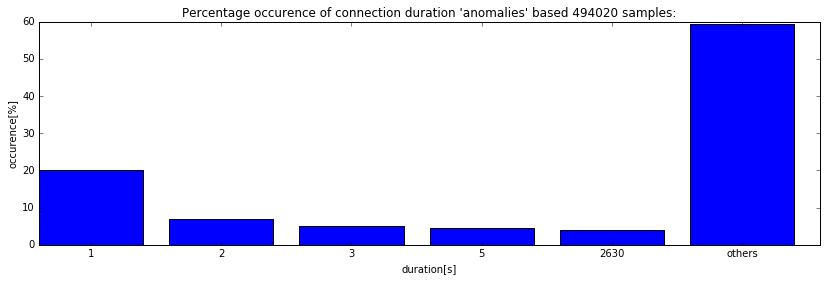

In [6]:
# Create histogram from '_n' data samples:
_n = len(durations)
durPortion = durations[:_n]
durPortion = sorted(durPortion)
durPortion = Counter(durPortion)
durPortion = sorted(durPortion.items(),key=operator.itemgetter(1),reverse=True)

_max=sum([item[1] for item in durPortion])
_toPopFront=0
for item in durPortion:
    if (item[1]/_max) > 0.9:
        _toPopFront += 1
for idx in range(_toPopFront):
    durPortion.pop(0)
_toPopRear=0
_rearCount=0
for item in durPortion:
    if (item[1]/_max) <= 0.001:
        _toPopRear += 1
        _rearCount += item[1]
for idx in range(_toPopRear):
    durPortion.pop(-1)
durPortion.append(('others',_rearCount))

lengths,counts = zip(*durPortion)

# Create plot:
_max=sum(counts)
_xAxis=numpy.arange(len(counts))
_width=0.8
matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(_xAxis,[(item/_max)*100 for item in counts],_width)
matplotlib.pyplot.xticks(_xAxis+_width*0.5,lengths)

# Show plot:
matplotlib.pyplot.xlabel('duration[s]')
matplotlib.pyplot.ylabel('occurence[%]')
matplotlib.pyplot.title('Percentage occurence of connection duration \'anomalies\' based %d samples:' % _n)
matplotlib.pyplot.show()

<p>
    Above plot shows how often different duration anomalies occured in tested dataset.
</p>

<h2>
    Connection protocols analysis:
</h2>
<h3>
    Histogram:
</h3>
<p>
    Basing on the fact that 'protocol types' column has symbolic values, 
    we are actually only able to create histogram for these datset.
</p>

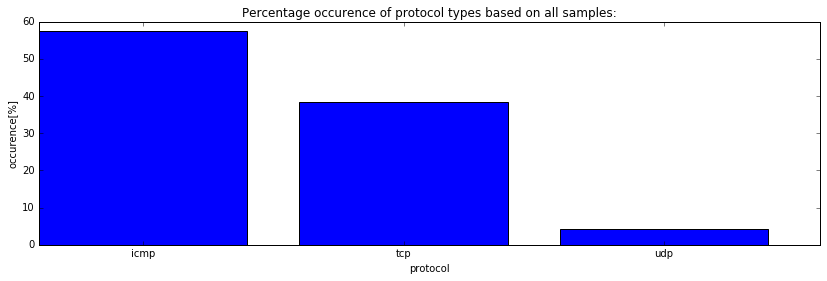

In [7]:
# Get list of protocol types:
protocols = csvData.as_matrix()[:,1].tolist()

# Sort and split data:
protocols = sorted(protocols)
protocols = Counter(protocols)
protocols = sorted(protocols.items(),key=operator.itemgetter(1),reverse=True)
lengths,counts = zip(*protocols)

# Create plot:
_max=sum(counts)
_xAxis=numpy.arange(len(counts))
_width=0.8
matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(_xAxis,[(item/_max)*100 for item in counts],_width)
matplotlib.pyplot.xticks(_xAxis+_width*0.5,lengths)

# Show plot:
matplotlib.pyplot.xlabel('protocol')
matplotlib.pyplot.ylabel('occurence[%]')
matplotlib.pyplot.title('Percentage occurence of protocol types based on all samples:')
matplotlib.pyplot.show()

<h2>
    Connection services analysis:
</h2>
<h3>
    Histogram
</h3>
<p>
    As with the previous property, 'service' is also symbolic and our options are limited to histogram data representation.<br>
    <br>
    <u>In order to make these plot readable services that occured less than 2% are going to be grouped.</u>
</p>

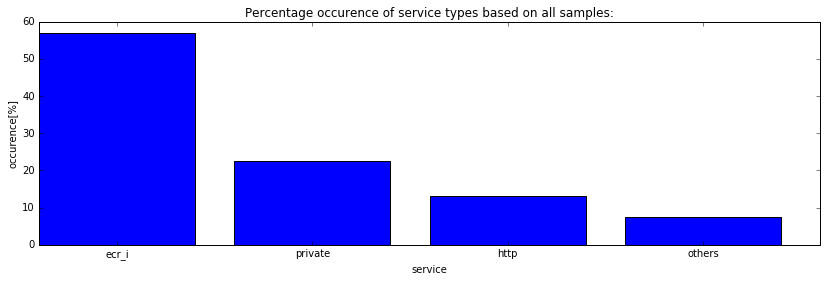

In [8]:
# Get list of service types:
services = csvData.as_matrix()[:,2].tolist()

# Sort and split data:
services = sorted(services)
services = Counter(services)
services = sorted(services.items(),key=operator.itemgetter(1),reverse=True)

_max=sum([item[1] for item in services])
_toPopRear=0
_rearCount=0
for item in services:
    if (item[1]/_max) <= 0.02:
        _toPopRear += 1
        _rearCount += item[1]
for idx in range(_toPopRear):
    services.pop(-1)
services.append(('others',_rearCount))

lengths,counts = zip(*services)

# Create plot:
_max=sum(counts)
_xAxis=numpy.arange(len(counts))
_width=0.8
matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(_xAxis,[(item/_max)*100 for item in counts],_width)
matplotlib.pyplot.xticks(_xAxis+_width*0.5,lengths)

# Show plot:
matplotlib.pyplot.xlabel('service')
matplotlib.pyplot.ylabel('occurence[%]')
matplotlib.pyplot.title('Percentage occurence of service types based on all samples:')
matplotlib.pyplot.show()

<h2>
    Source to destination data flow analysis:
</h2>
<h3>
    Scatterplot &amp; trend:
</h3>
<p>
    Because of nature of these kind of data it might be good to visualize it with scatterplot.
</p>

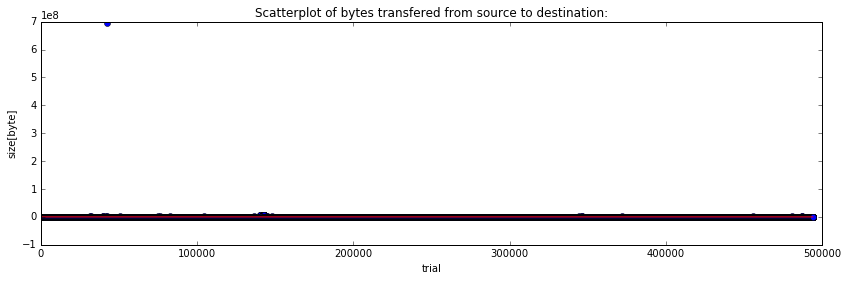

In [9]:
# Get list of transfered bytes:
srcToDst = csvData.as_matrix()[:,4].tolist()

# Make scatterplot:
_y=srcToDst
_x=numpy.arange(len(_y))
matplotlib.pyplot.plot(_x,_y,'bo')

# Calculate trendline:
# (Linear fitting.)
_z = numpy.polyfit(_x, _y, 1)
_p = numpy.poly1d(_z)
matplotlib.pyplot.plot(_x,_p(_x),'r-')

# Show plot:
matplotlib.pyplot.xlabel('trial')
matplotlib.pyplot.ylabel('size[byte]')
matplotlib.pyplot.title('Scatterplot of bytes transfered from source to destination:')
matplotlib.pyplot.show()

<p>
    As presented above, some highly outstanding samples prevents us from seeing details of other samples.<br>
    That is why below we are going to present only the 'invisible' part of scatterplot.
</p>

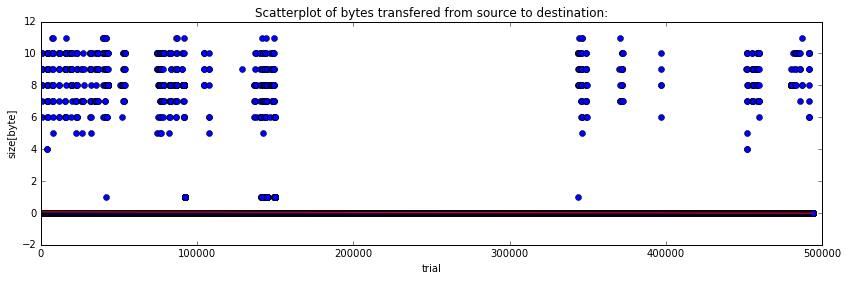

In [10]:
# Cut of samples with value higher than 6x10^8:
srcToDst = [item if item < (6*(10^8)) else 0 for item in srcToDst]

# Make scatterplot:
_y=srcToDst
_x=numpy.arange(len(_y))
matplotlib.pyplot.plot(_x,_y,'bo')

# Calculate trendline:
# (Linear fitting.)
_z = numpy.polyfit(_x, _y, 1)
_p = numpy.poly1d(_z)
matplotlib.pyplot.plot(_x,_p(_x),'r-')

# Show plot:
matplotlib.pyplot.xlabel('trial')
matplotlib.pyplot.ylabel('size[byte]')
matplotlib.pyplot.title('Scatterplot of bytes transfered from source to destination:')
matplotlib.pyplot.show()

<p>
    As we can observe these dataset occured to be higly repeatable.<br>
    There is a chance that it is going to present well in a form of histogram.<br>
    <br>
    It is also worth to mention that trend line is flat.<br>
    That suggests samples which size is close to zero prevail over the rest.
</p>

<h3>
    Histogram:
</h3>
<p>
    <u>Records that occured less than 0.5% times are gruped.</u>
</p>

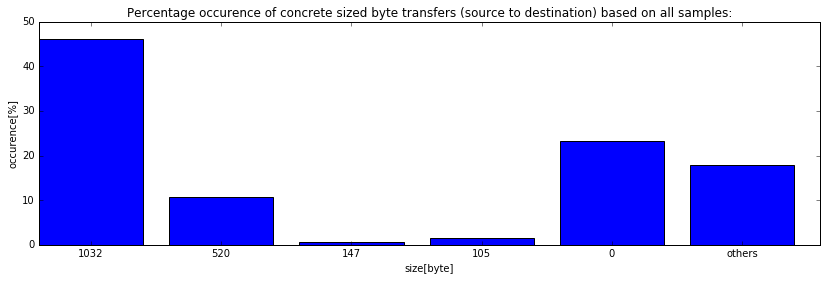

In [12]:
# Get list of transfered bytes:
srcToDst = csvData.as_matrix()[:,4].tolist()

# Sort and split data:
srcToDst = sorted(srcToDst)
srcToDst = dict(Counter(srcToDst))
srcToDst = sorted(srcToDst.items(),key=operator.itemgetter(1),reverse=True)

_max=sum([item[1] for item in srcToDst])
_toPopRear=0
_rearCount=0
for item in srcToDst:
    if (item[1]/_max) <= 0.005:
        _toPopRear += 1
        _rearCount += item[1]
for idx in range(_toPopRear):
    srcToDst.pop(-1)
srcToDst = sorted(srcToDst,key=lambda x: x[0],reverse=True)
srcToDst.append(('others',_rearCount))

lengths,counts = zip(*srcToDst)

# Create plot:
_max=sum(counts)
_xAxis=numpy.arange(len(counts))
_width=0.8
matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(_xAxis,[(item/_max)*100 for item in counts],_width)
matplotlib.pyplot.xticks(_xAxis+_width*0.5,lengths)

# Show plot:
matplotlib.pyplot.xlabel('size[byte]')
matplotlib.pyplot.ylabel('occurence[%]')
matplotlib.pyplot.title('Percentage occurence of concrete sized byte transfers (source to destination) based on all samples:')
matplotlib.pyplot.show()

<h2>
    Destination to source data flow analysis:
</h2>
<h3>
    scatterplot &amp; trend:
</h3>
<p>
    As this dataset is a twin to previous one (in its nature) we start with scatterplot.
</p>

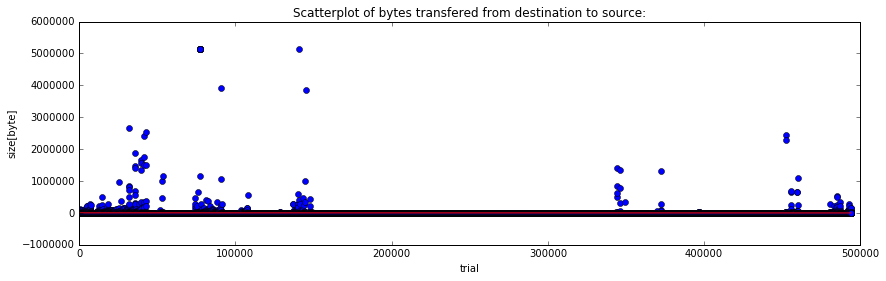

In [13]:
# Get list of transfered bytes:
dstToSrc = csvData.as_matrix()[:,5].tolist()

# Make scatterplot:
_y=dstToSrc
_x=numpy.arange(len(_y))
matplotlib.pyplot.plot(_x,_y,'bo')

# Calculate trendline:
# (Linear fitting.)
_z = numpy.polyfit(_x, _y, 1)
_p = numpy.poly1d(_z)
matplotlib.pyplot.plot(_x,_p(_x),'r-')

# Show plot:
matplotlib.pyplot.xlabel('trial')
matplotlib.pyplot.ylabel('size[byte]')
matplotlib.pyplot.title('Scatterplot of bytes transfered from destination to source:')
matplotlib.pyplot.show()

<p>
    Above study shows that this time we still can observe repeatability,<br>
    however these dataset seams to be even more centred in zero.
</p>

<h3>
    Histogram:
</h3>
<p>
    <u>Records that occured less than 0.5% times are gruped.</u>
</p>

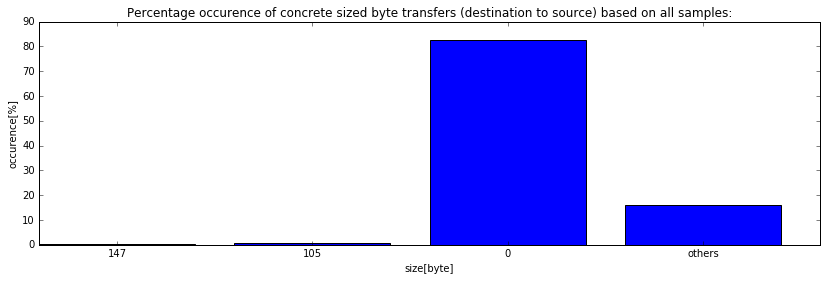

In [14]:
# Get list of transfered bytes:
dstToSrc = csvData.as_matrix()[:,5].tolist()

# Sort and split data:
dstToSrc = sorted(dstToSrc)
dstToSrc = dict(Counter(dstToSrc))
dstToSrc = sorted(dstToSrc.items(),key=operator.itemgetter(1),reverse=True)

_max=sum([item[1] for item in dstToSrc])
_toPopRear=0
_rearCount=0
for item in dstToSrc:
    if (item[1]/_max) <= 0.005:
        _toPopRear += 1
        _rearCount += item[1]
for idx in range(_toPopRear):
    dstToSrc.pop(-1)
dstToSrc = sorted(dstToSrc,key=lambda x: x[0],reverse=True)
dstToSrc.append(('others',_rearCount))

lengths,counts = zip(*dstToSrc)

# Create plot:
_max=sum(counts)
_xAxis=numpy.arange(len(counts))
_width=0.8
matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(_xAxis,[(item/_max)*100 for item in counts],_width)
matplotlib.pyplot.xticks(_xAxis+_width*0.5,lengths)

# Show plot:
matplotlib.pyplot.xlabel('size[byte]')
matplotlib.pyplot.ylabel('occurence[%]')
matplotlib.pyplot.title('Percentage occurence of concrete sized byte transfers (destination to source) based on all samples:')
matplotlib.pyplot.show()

<p>
    Above representation confirms our suspitions.<br>
    Analyzed dataset is highly centered in zero.
</p>

<h2>
    Conclusion:
</h2>
<p>
    Detecting anomalies with scatterplots and histograms (,and so on...),<br>
    so in general with quantity analysis is possible.<br>
    <br>
    However we should remember that some network activity might seem like an anomaly in one criteria,<br>
    but in general just be a normal connection.<br>
    <br>
    <u><b>For e.g.:</b></u><br>
    The fact that some connection endured awfully long doesn't mean it is out of place.<br>
    Some regular user might be just downloading some heavy data.<br>
    <br>
    Single connection should always be analized given many criteria,<br>
    because otherwise it might be incorrectly classified.
</p>